In [1]:
import time
import numpy as np
import pandas as pd

In [2]:
import tensorflow.python.keras as keras
from tensorflow.python.keras.layers import Layer
import tensorflow as tf
import dan_models
import dan_utils

In [3]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
class_set = [2, 3, 4]
v, v_class, id_402, part1, part2, seg, det_list_class, near_road_set  \
        = dan_utils.load_data(class_set, res=11, randseed=25)

There are 5 class(es)


C:\Users\10169\anaconda3\envs\dan_traff\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [5]:
# ind, class
# 0  , blue
# 1  , green
# 2  , yellow  <--
# 3  , black   <--
# 4  , red     <--
class_color_set = ['b', 'g', 'y', 'black', 'r']
class_i = 4

near_road = np.array(near_road_set[class_i])
flow = v_class[class_i].iloc[:, 2:-1]

prop = 8/10  # proportion of training data

k, t_p, t_input, t_pre, num_links = 5, 10, 12, 3, v_class[class_i].shape[0]
from_day = 21
to_day = 31

image_train, image_test, day_train, day_test, label_train, label_test\
= dan_utils.sliding_window(
    flow, near_road, from_day, to_day, prop, 
    k, t_p, t_input, t_pre, num_links
)

(1161, 5, 12, 40)
(928, 5, 12, 40)
(233, 5, 12, 40)
(928, 40, 3)
(233, 40, 3)


In [6]:
input_data = keras.Input(shape=(k,t_input,num_links), name='input_data')
input_HA = keras.Input(shape=(num_links, t_pre), name='input_HA')

finish_model = dan_models.build_model(input_data, input_HA)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_data (InputLayer)         [(None, 5, 12, 40)]  0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 5, 12, 40)    160         input_data[0][0]                 
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 5, 12, 40)    14440       batch_normalization[0][0]        
__________________________________________________________________________________________________
average_pooling2d (AveragePooli (None, 5, 12, 40)    0           conv2d[0][0]                     
______________________________________________________________________________________________

In [7]:
finish_model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
X_train = image_train
X_HA_train = day_train
label_train = label_train

In [9]:
#模型拟合与评估
finish_model.fit([X_train,X_HA_train], label_train, epochs=200, batch_size=128,
validation_data=([image_test,day_test], label_test))
# finish_model.evaluate(image_test, label_test)

Epoch 1/200
8/8 [==============================] - 5s 299ms/step - loss: 220275.0087 - val_loss: 224669.2812
Epoch 2/200
8/8 [==============================] - 0s 10ms/step - loss: 218200.9931 - val_loss: 217149.0469
Epoch 3/200
8/8 [==============================] - 0s 10ms/step - loss: 213455.4462 - val_loss: 197781.5938
Epoch 4/200
8/8 [==============================] - 0s 10ms/step - loss: 201950.5226 - val_loss: 165738.2969
Epoch 5/200
8/8 [==============================] - 0s 10ms/step - loss: 194738.6753 - val_loss: 135132.8594
Epoch 6/200
8/8 [==============================] - 0s 10ms/step - loss: 191387.8125 - val_loss: 119065.0703
Epoch 7/200
8/8 [==============================] - 0s 10ms/step - loss: 167158.0000 - val_loss: 115018.0391
Epoch 8/200
8/8 [==============================] - 0s 9ms/step - loss: 147851.1076 - val_loss: 119256.4453
Epoch 9/200
8/8 [==============================] - 0s 10ms/step - loss: 123055.3264 - val_loss: 110306.9219
Epoch 10/200
8/8 [==========

8/8 [==============================] - 0s 9ms/step - loss: 25481.9707 - val_loss: 28981.6992
Epoch 78/200
8/8 [==============================] - 0s 9ms/step - loss: 24891.7982 - val_loss: 28326.2949
Epoch 79/200
8/8 [==============================] - 0s 10ms/step - loss: 23725.2613 - val_loss: 28003.1797
Epoch 80/200
8/8 [==============================] - 0s 10ms/step - loss: 24259.2520 - val_loss: 27912.6270
Epoch 81/200
8/8 [==============================] - 0s 10ms/step - loss: 23107.8915 - val_loss: 27494.8848
Epoch 82/200
8/8 [==============================] - 0s 10ms/step - loss: 22835.7140 - val_loss: 26879.3340
Epoch 83/200
8/8 [==============================] - 0s 10ms/step - loss: 22963.5883 - val_loss: 26406.0352
Epoch 84/200
8/8 [==============================] - 0s 10ms/step - loss: 22579.6706 - val_loss: 25960.8457
Epoch 85/200
8/8 [==============================] - 0s 11ms/step - loss: 22410.8418 - val_loss: 25736.4336
Epoch 86/200
8/8 [==============================] - 

8/8 [==============================] - 0s 9ms/step - loss: 10393.4862 - val_loss: 14473.8545
Epoch 154/200
8/8 [==============================] - 0s 10ms/step - loss: 10183.8636 - val_loss: 14188.4219
Epoch 155/200
8/8 [==============================] - 0s 10ms/step - loss: 9771.9966 - val_loss: 14077.3809
Epoch 156/200
8/8 [==============================] - 0s 10ms/step - loss: 9881.6220 - val_loss: 13982.9824
Epoch 157/200
8/8 [==============================] - 0s 9ms/step - loss: 9471.0321 - val_loss: 13990.5674
Epoch 158/200
8/8 [==============================] - 0s 10ms/step - loss: 9588.6032 - val_loss: 14330.9785
Epoch 159/200
8/8 [==============================] - 0s 10ms/step - loss: 9522.3734 - val_loss: 13688.0459
Epoch 160/200
8/8 [==============================] - 0s 10ms/step - loss: 9430.1746 - val_loss: 13675.7812
Epoch 161/200
8/8 [==============================] - 0s 10ms/step - loss: 9294.3955 - val_loss: 13664.6963
Epoch 162/200
8/8 [==============================] 

In [10]:
#模型预测
model_pre = finish_model.predict([image_test,day_test])

In [11]:
#计算各项误差指标

mape_mean = dan_utils.mape_loss_func(model_pre, label_test)
smape_mean = dan_utils.smape_loss_func(model_pre, label_test)
mae_mean = dan_utils.mae_loss_func(model_pre, label_test)

print('mape = ' + str(mape_mean) + '\n' + 'smape = ' + str(smape_mean) + '\n' + 'mae = ' + str(mae_mean))

mape = 0.25450298305047697
smape = 0.19865168538759842
mae = 64.75505094935109


In [12]:
#模型保存
# finish_model.save_weights('../model/base_ST-DTNN_mape=%.5f.h5'%(mape_mean))
finish_model.save_weights('../model/source_%s.h5'%(class_color_set[class_i]))

In [13]:
#计算每条路段的误差
mape_list = []
for i in range(num_links):
    a1 = dan_utils.mape_loss_func(model_pre[:,i,:], label_test[:,i,:])
    mape_list.append(a1)
    print(str(i+1)+'th link')
    print(a1)

1th link
0.0985785386040883
2th link
1.0912296174241922
3th link
0.08598188865226307
4th link
0.834606944036996
5th link
0.08026781002390568
6th link
0.09254326669199867
7th link
0.229237627223306
8th link
0.5669601686797798
9th link
0.07431305835116322
10th link
0.17430840777767023
11th link
0.10620398360746527
12th link
0.09367987161924952
13th link
0.9803577893380006
14th link
0.09241001752181757
15th link
0.14520978046503563
16th link
0.06958737051755726
17th link
0.2805396426058296
18th link
0.2632775976134775
19th link
0.4051617551486597
20th link
0.21329150015987947
21th link
0.11328428420168082
22th link
0.20596508840266167
23th link
0.8001636635132529
24th link
0.07928867455920026
25th link
0.10784105826353037
26th link
0.0684329901387885
27th link
0.07886544320485521
28th link
0.0936797685513872
29th link
0.10587585408309258
30th link
0.4953222103568055
31th link
0.11270734145662878
32th link
0.48181959284364073
33th link
0.5102835664581195
34th link
0.10682371893069471
35th 

In [14]:
mape_pd = pd.Series(mape_list)

In [15]:
mape_pd.sort_values()

39    0.068170
25    0.068433
15    0.069587
8     0.074313
26    0.078865
23    0.079289
4     0.080268
2     0.085982
13    0.092410
5     0.092543
27    0.093680
11    0.093680
0     0.098579
28    0.105876
10    0.106204
33    0.106824
24    0.107841
30    0.112707
20    0.113284
34    0.114936
37    0.121423
38    0.131903
14    0.145210
35    0.148098
9     0.174308
21    0.205965
19    0.213292
6     0.229238
36    0.257488
17    0.263278
16    0.280540
18    0.405162
31    0.481820
29    0.495322
32    0.510284
7     0.566960
22    0.800164
3     0.834607
12    0.980358
1     1.091230
dtype: float64

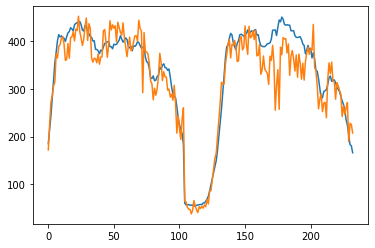

In [16]:
import matplotlib.pyplot as plt

plt.plot(model_pre[:, 0, 0])
plt.plot(label_test[:, 0, 0])

In [17]:
model_pre.shape

(233, 40, 3)